In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) 
    print("AUC: %.2f" % auc(fpr, tpr))
    print(confusion_matrix(ytest, pred))

In [48]:
import pandas as pd
df2 = pd.read_csv('Train.csv')

X = df2.drop(columns=['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N'])
y = df2['Reached.on.Time_Y.N'] # target

# split Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [57]:
df2['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [49]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(random_state=42)
lr1.fit(X_train, y_train)

y_pred = lr1.predict(X_test)
eval_classification(lr1, y_pred, X_train, y_train, X_test, y_test)
print('Train score: ' + str(lr1.score(X_train, y_train))) 
print('Test score:' + str(lr1.score(X_test, y_test)))

Accuracy (Test Set): 0.63
Precision (Test Set): 0.71
Recall (Test Set): 0.67
F1-Score (Test Set): 0.69
AUC: 0.63
[[ 771  541]
 [ 665 1323]]
Train score: 0.6359267437329523
Test score:0.6345454545454545


In [50]:
# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# list hyperparameter:
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002, 0.01, 1] 
hyperparameters = dict(penalty=penalty, C=C)

lr2 = LogisticRegression(random_state=42) 
model1 = RandomizedSearchCV(lr2, hyperparameters, cv=13, random_state=42, scoring='f1'
                            ,n_iter=60)

model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
eval_classification(model1, y_pred, X_train, y_train, X_test, y_test)
print('Train score: ' + str(model1.score(X_train, y_train))) 
print('Test score:' + str(model1.score(X_test, y_test)))

Accuracy (Test Set): 0.64
Precision (Test Set): 0.71
Recall (Test Set): 0.67
F1-Score (Test Set): 0.69
AUC: 0.63
[[ 761  551]
 [ 651 1337]]
Train score: 0.6905080213903744
Test score:0.6898864809081527


In [51]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier()
knn1.fit(X_train, y_train)

y_pred = knn1.predict(X_test)
eval_classification(knn1, y_pred, X_train, y_train, X_test, y_test)
print('Train score: ' + str(knn1.score(X_train, y_train))) 
print('Test score: ' + str(knn1.score(X_test, y_test)))

Accuracy (Test Set): 0.65
Precision (Test Set): 0.73
Recall (Test Set): 0.68
F1-Score (Test Set): 0.70
AUC: 0.64
[[ 804  508]
 [ 644 1344]]
Train score: 0.7821795038316665
Test score: 0.6509090909090909


In [52]:
# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
# list hyperparameter:
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform','distance']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm, weights=weights)

knn2 = KNeighborsClassifier()
model2 = RandomizedSearchCV(knn2, hyperparameters, cv=5, random_state=42, scoring='f1')

# Fit Model & Evaluasi
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
eval_classification(model2, y_pred, X_train, y_train, X_test, y_test)
print('Train score: ' + str(model2.score(X_train, y_train))) 
print('Test score: ' + str(model2.score(X_test, y_test)))

Accuracy (Test Set): 0.66
Precision (Test Set): 0.72
Recall (Test Set): 0.70
F1-Score (Test Set): 0.71
AUC: 0.65
[[ 779  533]
 [ 597 1391]]
Train score: 1.0
Test score: 0.7111451942740287


In [53]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(random_state=42)
dt1.fit(X_train,y_train)

y_pred = dt1.predict(X_test)
eval_classification(dt1, y_pred, X_train, y_train, X_test, y_test)
print('Train score: ' + str(dt1.score(X_train, y_train))) 
print('Test score:' + str(dt1.score(X_test, y_test)))

Accuracy (Test Set): 0.66
Precision (Test Set): 0.72
Recall (Test Set): 0.73
F1-Score (Test Set): 0.72
AUC: 0.64
[[ 736  576]
 [ 541 1447]]
Train score: 1.0
Test score:0.6615151515151515


In [54]:
# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np
# list hyperparameter: # parameter ini masih bisa dicoba2
max_depth = [int(x) for x in np.linspace(1, 110, num = 38)] 
min_samples_split = [2, 5, 10, 100] 
min_samples_leaf = [1, 2, 4, 10, 20, 50]
max_features = ['auto', 'sqrt'] 

#criterion = ['gini','entropy']
#splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
#                       ,criterion=criterion,
#                       splitter=splitter
                      )

# Inisialisasi Model
dt2 = DecisionTreeClassifier(random_state=42)
model3 = RandomizedSearchCV(dt2, hyperparameters, cv=5, random_state=42, scoring='f1'
                           , n_iter=20) # cobain lagi n_iter
model3.fit(X_train, y_train)

# Predict & Evaluation
y_pred = model3.predict(X_test)
eval_classification(model3, y_pred, X_train, y_train, X_test, y_test)
print('Train score: ' + str(model3.score(X_train, y_train))) 
print('Test score:' + str(model3.score(X_test, y_test)))

Accuracy (Test Set): 0.67
Precision (Test Set): 0.75
Recall (Test Set): 0.67
F1-Score (Test Set): 0.71
AUC: 0.67
[[ 872  440]
 [ 659 1329]]
Train score: 0.7587648014859532
Test score:0.7074793718392334


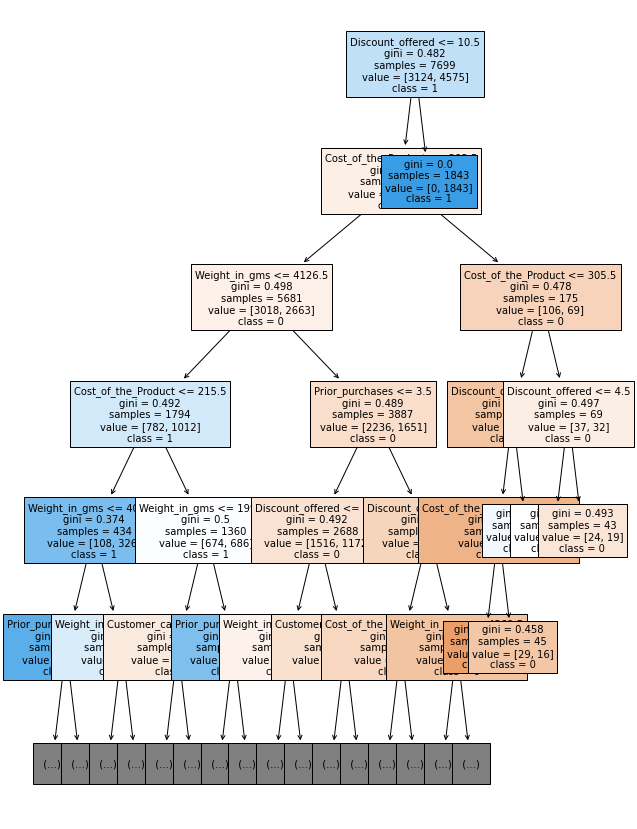

In [55]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 15))
tree.plot_tree(model3.best_estimator_,
               feature_names = X.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=10)
plt.show()

Text(0.5, 1.0, 'feature importance score')

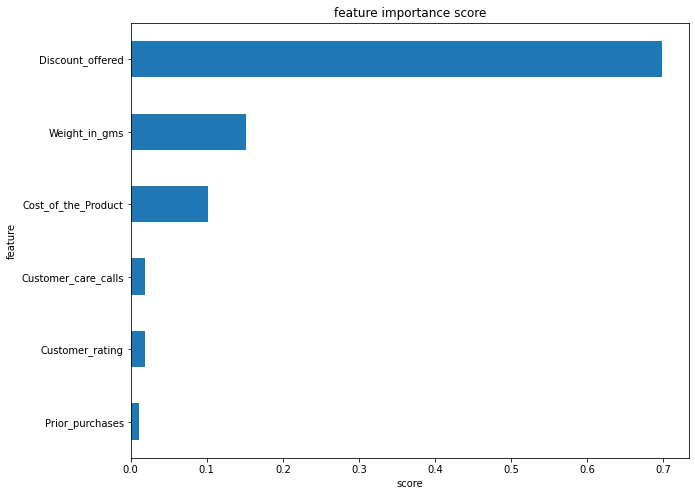

In [56]:
feat_importances = pd.Series(model3.best_estimator_.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')